In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

## Reading the csv files

In [2]:
chapters_df = pd.read_csv('Harry_Potter_Movies/Chapters.csv', encoding='ISO-8859-1')
characters_df = pd.read_csv('Harry_Potter_Movies/Characters.csv', encoding='ISO-8859-1')
dialogue_df = pd.read_csv('Harry_Potter_Movies/Dialogue.csv', encoding='ISO-8859-1')
movies_df = pd.read_csv('Harry_Potter_Movies/Movies.csv', encoding='ISO-8859-1')
places_df = pd.read_csv('Harry_Potter_Movies/Places.csv', encoding='ISO-8859-1')
spells_df = pd.read_csv('Harry_Potter_Movies/Spells.csv', encoding='ISO-8859-1')

## Combining characters and dialogue to have more detailed analysys

In [3]:
characters_df

,Character ID,Character Name,Species,Gender,House,Patronus,Wand (Wood),Wand (Core)
0,1,Harry Potter,Human,Male,Gryffindor,Stag,Holly,Phoenix Feather
1,2,Ron Weasley,Human,Male,Gryffindor,Jack Russell Terrier,NaN,NaN
2,3,Hermione Granger,Human,Female,Gryffindor,Otter,Vine,Dragon Heartstring
3,4,Albus Dumbledore,Human,Male,Gryffindor,Phoenix,Elder,Thestral Tail Hair
4,5,Rubeus Hagrid,Half-Human/Half-Giant,Male,Gryffindor,NaN,Oak,NaN
...,...,...,...,...,...,...,...,...
161,162,Waiter,NaN,NaN,NaN,NaN,NaN,NaN
162,163,Boy 2,NaN,NaN,NaN,NaN,NaN,NaN
163,164,Crowd,NaN,NaN,NaN,NaN,NaN,NaN
164,165,Gryffindors,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dialogue_df = dialogue_df.merge(characters_df[['Character ID', 'Character Name', 'Species', 'Gender', 'House']], on='Character ID')
dialogue_df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Character Name,Species,Gender,House
0,1,1,8,4,I should have known that you would be here...P...,Albus Dumbledore,Human,Male,Gryffindor
1,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Albus Dumbledore,Human,Male,Gryffindor
2,5,1,8,4,Hagrid is bringing him.,Albus Dumbledore,Human,Male,Gryffindor
3,7,1,8,4,"Ah, Professor, I would trust Hagrid with my life.",Albus Dumbledore,Human,Male,Gryffindor
4,9,1,8,4,"No problems, I trust, Hagrid?",Albus Dumbledore,Human,Male,Gryffindor
...,...,...,...,...,...,...,...,...,...
7439,7435,234,71,84,Dad?,Albus Potter,Human,Male,Slytherin
7440,7437,234,71,84,What if I'm put in Slytherin?,Albus Potter,Human,Male,Slytherin
7441,7439,234,71,84,But just say I am --,Albus Potter,Human,Male,Slytherin
7442,7441,234,71,84,Really?,Albus Potter,Human,Male,Slytherin


## Run sentiment analysis over dialogue

In [17]:
dialogue_df.dtypes

Dialogue ID        int64
Chapter ID         int64
Place ID           int64
Character ID       int64
Dialogue          object
Character Name    object
Species           object
Gender            object
House             object
dtype: object

In [16]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))
    return sentiment

### Combine dialogue and character name

In [52]:
dialogue_df['Dialogue'] = dialogue_df['Dialogue'].astype(str)
dialogue_df

,Dialogue ID,Chapter ID,Place ID,Character ID,Dialogue,Character Name,Species,Gender,House,Text
0,1,1,8,4,I should have known that you would be here...P...,Albus Dumbledore,Human,Male,Gryffindor,I should have known that you would be here...P...
1,3,1,8,4,"I'm afraid so, Professor. The good, and the bad.",Albus Dumbledore,Human,Male,Gryffindor,"I'm afraid so, Professor. The good, and the ba..."
2,5,1,8,4,Hagrid is bringing him.,Albus Dumbledore,Human,Male,Gryffindor,Hagrid is bringing him. Albus Dumbledore
3,7,1,8,4,"Ah, Professor, I would trust Hagrid with my life.",Albus Dumbledore,Human,Male,Gryffindor,"Ah, Professor, I would trust Hagrid with my li..."
4,9,1,8,4,"No problems, I trust, Hagrid?",Albus Dumbledore,Human,Male,Gryffindor,"No problems, I trust, Hagrid? Albus Dumbledore"
...,...,...,...,...,...,...,...,...,...,...
7439,7435,234,71,84,Dad?,Albus Potter,Human,Male,Slytherin,Dad? Albus Potter
7440,7437,234,71,84,What if I'm put in Slytherin?,Albus Potter,Human,Male,Slytherin,What if I'm put in Slytherin? Albus Potter
7441,7439,234,71,84,But just say I am --,Albus Potter,Human,Male,Slytherin,But just say I am -- Albus Potter
7442,7441,234,71,84,Really?,Albus Potter,Human,Male,Slytherin,Really? Albus Potter


In [53]:
sentiment_df = dialogue_df[['Dialogue', 'Character Name']].copy()
sentiment_df['Sentiment'] = sentiment_df['Dialogue'].apply(get_sentiment)

In [54]:
sentiment_df['compound'] = sentiment_df['Sentiment'].apply(lambda x: x['compound'])
sentiment_df['positive'] = sentiment_df['compound'].apply(lambda x: 1 if x > 0 else 0)
sentiment_df['negative'] = sentiment_df['compound'].apply(lambda x: 1 if x < 0 else 0)
sentiment_df['neutral'] = sentiment_df['compound'].apply(lambda x: 1 if x == 0 else 0)

In [55]:
sentiment_by_character = sentiment_df.groupby('Character Name')[['positive', 'negative', 'neutral']].sum()
sentiment_by_character['total'] = sentiment_by_character['positive'] + sentiment_by_character['negative'] + sentiment_by_character['neutral']
sentiment_by_character['positive_pct'] = sentiment_by_character['positive'] / sentiment_by_character['total']
sentiment_by_character['negative_pct'] = sentiment_by_character['negative'] / sentiment_by_character['total']
sentiment_by_character['neutral_pct'] = sentiment_by_character['neutral'] / sentiment_by_character['total']
sentiment_by_character.sort_values(by='total', ascending=False, inplace=True)
sentiment_by_character[:15]

,positive,negative,neutral,total,positive_pct,negative_pct,neutral_pct
Character Name,,,,,,,
Harry Potter,457,378,1087,1922,0.237773,0.196670,0.565557
Ron Weasley,208,211,446,865,0.240462,0.243931,0.515607
Hermione Granger,223,190,435,848,0.262972,0.224057,0.512972
Albus Dumbledore,199,98,177,474,0.419831,0.206751,0.373418
Rubeus Hagrid,79,61,88,228,0.346491,0.267544,0.385965
Severus Snape,58,33,77,168,0.345238,0.196429,0.458333
Minerva McGonagall,50,24,56,130,0.384615,0.184615,0.430769
Horace Slughorn,64,26,38,128,0.500000,0.203125,0.296875
Voldemort,36,37,45,118,0.305085,0.313559,0.381356


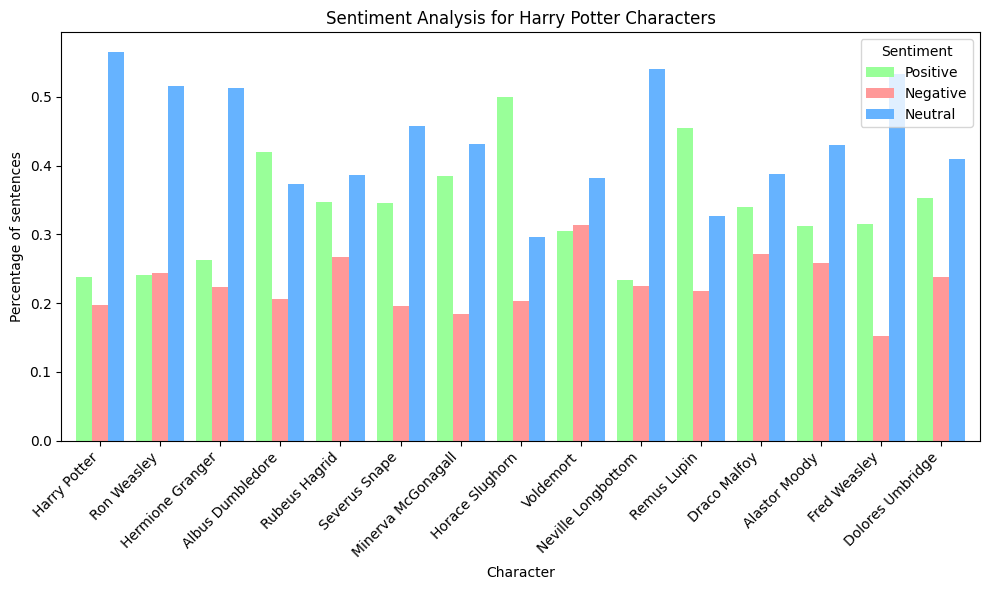

In [58]:
# Set a color palette for the sentiment categories
colors = ['#99ff99', '#ff9999', '#66b3ff']

# Set the bar width (adjust this value as needed)
bar_width = 0.8  # Narrower bars

# Plot a stacked bar chart for sentiment distribution
ax = sentiment_by_character[:15][['positive_pct', 'negative_pct', 'neutral_pct']].plot(kind='bar', stacked=False, color=colors, figsize=(10, 6), width=bar_width)

# Set labels and title
plt.title('Sentiment Analysis for Harry Potter Characters')
plt.xlabel('Character')
plt.ylabel('Percentage of sentences')

# Customize legend
legend_labels = ['Positive', 'Negative', 'Neutral']
legend = plt.legend(title='Sentiment', labels=legend_labels, loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()